### `Task` How dimensionality reduction using Principal Component Analysis (PCA) on the Wine Quality dataset contributes to improving the classification accuracy and efficiency of wine type.

Note : Use KNN for Classification.

Data Link :  [Wine Data](https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv)

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [30]:
# Data Loading
wine_data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv"
df = pd.read_csv(wine_data_path)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [31]:
df.shape

(6497, 13)

In [32]:
df['type'].unique()

array(['white', 'red'], dtype=object)

In [33]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [34]:
df.duplicated().sum()

1168

In [35]:
df=df.dropna()

In [36]:
df.drop_duplicates(inplace=True)

In [37]:
# After removing duplicates and null data
df.shape

(5295, 13)

In [38]:
X=df.drop('type',axis=1)
y=df['type']

In [39]:
# Train_Test_Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Applying Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Training a KNN model without Perfoming PCA

In [52]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled,y_train)
y_pred=knn.predict(X_test_scaled)
print("KNN having features -", X_train_scaled.shape[1])
print('Accuracy without PCA - ',accuracy_score(y_test,y_pred)*100)

KNN having features - 12
Accuracy without PCA -  99.33899905571295


# Training a KNN model after perfoming PCA

In [50]:
pca=PCA(n_components=5)
X_train_pca=pca.fit_transform(X_train_scaled)
X_test_pca=pca.transform(X_test_scaled)

knn_pca=KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca,y_train)
y_pred_pca=knn_pca.predict(X_test_pca)

y_pred_pca = knn_pca.predict(X_test_pca)

accuracy_pca = accuracy_score(y_test, y_pred_pca)

print("KNN having features -", X_train_pca.shape[1])
print("Classification Accuracy with PCA: {:.2f}%".format(accuracy_pca * 100))

KNN having features - 5
Classification Accuracy with PCA: 98.87%


#** Analyzing the result**

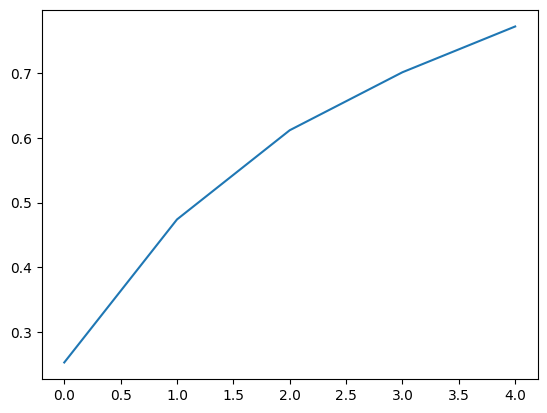

In [53]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [55]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_scaled[:,0],y=X_train_scaled[:,1],z=X_train_scaled[:,2],
                   color=y_train_trf)
fig.update_layout(
margin = dict(l=20,r=20,t=20,b=20)
)
fig.show()